In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from information_driven_bars import *
from datetime import datetime

# Daskを使うことでPandas互換で読み込める
import dask.dataframe as dd

In [4]:
# Pandas互換
df = dd.read_csv("INDICES200601-20081231-N105804263-part001.csv")

In [5]:
df.shape

(<dask_expr.expr.Scalar: expr=ReadCSV(e54bf13).size() / 24, dtype=float64>, 24)

In [6]:
df.head()

#RIC  Current RIC      Date[L]          Time[L]            Type  \
0  .HSI          NaN  03-JAN-2006  06:23:07.698117  Mkt. Condition   
1  .HSI          NaN  03-JAN-2006  06:23:07.698117      Correction   
2  .HSI          NaN  03-JAN-2006  10:00:17.037121           Index   
3  .HSI          NaN  03-JAN-2006  10:00:17.339836           Index   
4  .HSI          NaN  03-JAN-2006  10:00:31.900701           Index   

   Ex/Cntrb.ID     Price      Volume  Market VWAP  Bid Price  ...  Exch Time  \
0          NaN       NaN         NaN          NaN        NaN  ...        NaN   
1          NaN      0.00         NaN          NaN        NaN  ...        NaN   
2          NaN  14843.97         0.0          NaN        NaN  ...        NaN   
3          NaN  14843.97  19649233.0          NaN        NaN  ...        NaN   
4          NaN  14850.92  19649233.0          NaN        NaN  ...        NaN   

   New Price  New Vol Trd/Qte Date  30 Day ATM IV Call  60 Day ATM IV Call  \
0        NaN      NaN          NaN                 NaN                 NaN   
1        NaN      NaN          NaN                 NaN                 NaN   
2        NaN      NaN          NaN                 NaN                 NaN   
3        NaN      NaN          NaN                 NaN                 NaN   
4        NaN      NaN          NaN                 NaN                 NaN   

   90 Day ATM IV Call  30 Day ATM IV Put  60 Day ATM IV Put  90 Day ATM IV Put  
0                 NaN                NaN                NaN                NaN  
1                 NaN                NaN                NaN                NaN  
2                 NaN                NaN                NaN                NaN  
3                 NaN                NaN                NaN                NaN  
4                 NaN                NaN                NaN                NaN  

[5 rows x 24 columns]

In [7]:
df['#RIC'].unique()

Dask Series Structure:
npartitions=49
    string
       ...
     ...  
       ...
       ...
Dask Name: unique, 3 expressions
Expr=Unique(frame=ReadCSV(e54bf13)['#RIC'])

In [8]:
df['date'] = df['Date[L]'].astype(str) + "T" + df['Time[L]'].astype(str)

In [9]:
df['date'].head()

0    03-JAN-2006T06:23:07.698117
1    03-JAN-2006T06:23:07.698117
2    03-JAN-2006T10:00:17.037121
3    03-JAN-2006T10:00:17.339836
4    03-JAN-2006T10:00:31.900701
Name: date, dtype: object

In [13]:
df['date'] = dd.to_datetime(df['date'], format = "%d-%b-%YT%H:%M:%S.%f")

In [16]:
df['date'].head()

0   2006-01-03 06:23:07.698117
1   2006-01-03 06:23:07.698117
2   2006-01-03 10:00:17.037121
3   2006-01-03 10:00:17.339836
4   2006-01-03 10:00:31.900701
Name: date, dtype: datetime64[ns]

In [17]:
df['Type'].unique()

Dask Series Structure:
npartitions=49
    string
       ...
     ...  
       ...
       ...
Dask Name: unique, 13 expressions
Expr=Unique(frame=Assign(frame=Assign(frame=ReadCSV(e54bf13)))['Type'])

In [20]:
df[df['Type']=="index"]["Price"].isna().sum()

<dask_expr.expr.Scalar: expr=(IsNa(frame=(Filter(frame=Assign(frame=Assign(frame=ReadCSV(e54bf13))), predicate=Assign(frame=Assign(frame=ReadCSV(e54bf13)))['Type'] == index))['Price'])).sum(), dtype=int64>


In [19]:
df[df['Type']=="index"]["Volume"].isna().sum()

<dask_expr.expr.Scalar: expr=(IsNa(frame=(Filter(frame=Assign(frame=Assign(frame=ReadCSV(e54bf13))), predicate=Assign(frame=Assign(frame=ReadCSV(e54bf13)))['Type'] == index))['Volume'])).sum(), dtype=int64>

In [21]:
tick_time, T_list, _ = tick_imbalance_bar(df['Price'][:10000], 100, 100)

In [22]:
tick_time

[100]

In [24]:
def tick_bar(price, n_tick):
    len_price=len(price)
    n_bars = int(np.floor(len_price / n_tick))
    ret = []
    for i in range(n_bars):
        start = i*n_tick; end = (i+1)*n_tick -1
        ret.append(price[end] - price[start])
    return ret

In [27]:
#ret_tick = tick_bar(df['Price'].to_numpy(), 100)
ret_tick = tick_bar(df['Price'].to_dask_array().compute(),100)

(array([4.00000e+00, 0.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 3.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 2.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00,
        3.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00,
        2.00000e+00, 1.00000e+01, 6.00000e+00, 1.00000e+01, 3.00000e+00,
        2.00000e+00, 1.00000e+01, 9.00000e+00, 8.00000e+00, 1.20000e+01,
        8.00000e+00, 1.60000e+01, 1.20000e+01, 1.90000e+01, 9.60000e+01,
        4.17272e+05, 1.10680e+04, 6.40000e+01, 1.30000e+01, 1.30000e+01,
        1.30000e+01, 1.10000e+01, 4.00000e+00, 9.00000e+00, 1.10000e+01,
        7.00000e+00, 7.00000e+00, 1.00000e+00, 6.00000e+00, 5.00000e+00,
        9.00000e+00, 2.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 3.00000e+00, 1.00

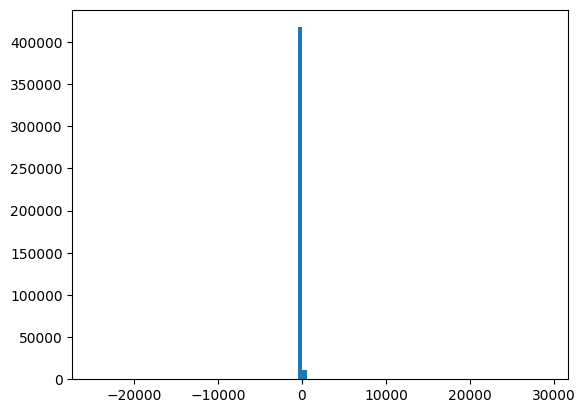

In [28]:
plt.hist(ret_tick, bins=100)

In [29]:
def volume_bar(price, volume, volume_th):
    len_price=len(price)
    ret = []; cum_vol = 0
    count = 0
    for i in range(len_price):
        if cum_vol == 0:
            start_price = price[i]
        cum_vol += volume[i]
        if cum_vol > volume_th:
            count += 1
            close_price = price[i]
            ret.append(close_price - start_price)
            cum_vol = 0
    print(count/len(price))
    return ret

In [30]:
df1 = df[(df['Type']=='Index') & (df['Price']!=0) & (df['#RIC']=='.HSI')]

In [32]:
ret_vol = volume_bar(df1['Price'].to_dask_array().compute(), df1['Volume'].to_dask_array().compute(), 10**11)
#ret_vol = volume_bar(df1['Price'].to_numpy(), df1['Volume'].to_numpy(), 10**11)

0.00846320564249037


In [33]:
df1['Price'].describe()

Dask Series Structure:
npartitions=1
    float64
        ...
Dask Name: describenumeric, 22 expressions
Expr=((Filter(frame=Assign(frame=Assign(frame=ReadCSV(e54bf13))), predicate=Assign(frame=Assign(frame=ReadCSV(e54bf13)))['Type'] == Index & Assign(frame=Assign(frame=ReadCSV(e54bf13)))['Price'] != 0 & Assign(frame=Assign(frame=ReadCSV(e54bf13)))['#RIC'] == .HSI))['Price']).describenumeric(split_every=False)

In [34]:
plt.plot(df1['date'], df1["Price"])

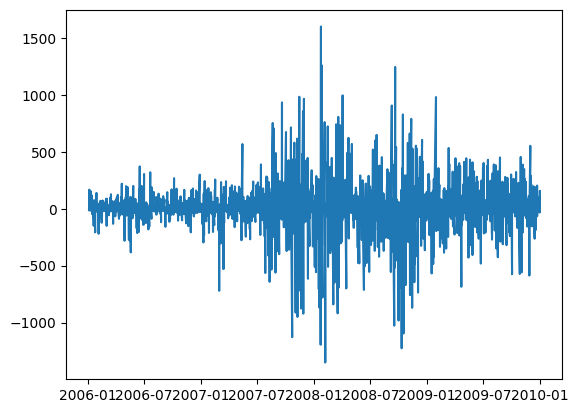

In [ ]:
plt.plot(df1['date'], df1["Price"].diff())

In [ ]:
len(df)/(365*4)

29394.90068493151

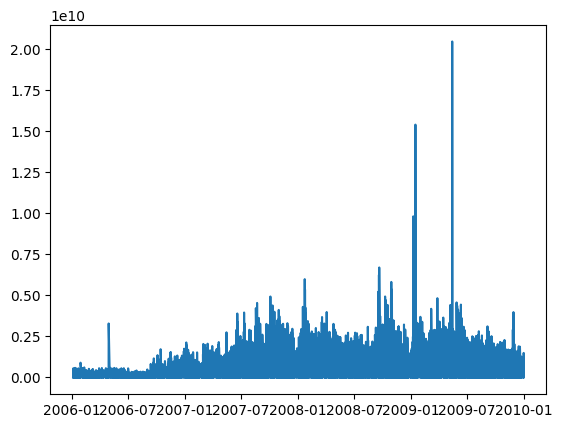

In [ ]:
plt.plot(df1['date'], df1["Volume"])

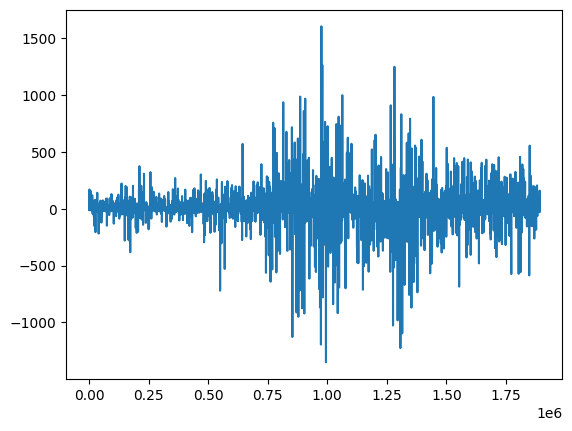

In [ ]:
plt.plot(df1["Price"].diff())

In [ ]:
df1.loc[975505:975515]

#RIC  Current RIC      Date[L]          Time[L]   Type  Ex/Cntrb.ID  \
975506  .HSI          NaN  22-JAN-2008  16:01:31.243301  Index          NaN   
975507  .HSI          NaN  22-JAN-2008  16:01:31.647572  Index          NaN   
975510  .HSI          NaN  23-JAN-2008  10:00:16.988797  Index          NaN   
975511  .HSI          NaN  23-JAN-2008  10:00:17.103048  Index          NaN   
975512  .HSI          NaN  23-JAN-2008  10:00:31.518414  Index          NaN   
975513  .HSI          NaN  23-JAN-2008  10:00:31.678560  Index          NaN   
975514  .HSI          NaN  23-JAN-2008  10:00:46.283094  Index          NaN   
975515  .HSI          NaN  23-JAN-2008  10:00:46.437381  Index          NaN   

           Price        Volume  Market VWAP  Bid Price  ...  New Price  \
975506  21757.63  5.941490e+09          NaN        NaN  ...        NaN   
975507  21757.63  5.979656e+09          NaN        NaN  ...        NaN   
975510  23359.20  0.000000e+00          NaN        NaN  ...        NaN   
975511  23359.20  2.060479e+08          NaN        NaN  ...        NaN   
975512  23337.45  2.060479e+08          NaN        NaN  ...        NaN   
975513  23337.45  2.299089e+08          NaN        NaN  ...        NaN   
975514  23366.21  2.299089e+08          NaN        NaN  ...        NaN   
975515  23366.21  2.452883e+08          NaN        NaN  ...        NaN   

        New Vol  Trd/Qte Date 30 Day ATM IV Call  60 Day ATM IV Call  \
975506      NaN           NaN                NaN                 NaN   
975507      NaN           NaN                NaN                 NaN   
975510      NaN           NaN                NaN                 NaN   
975511      NaN           NaN                NaN                 NaN   
975512      NaN           NaN                NaN                 NaN   
975513      NaN           NaN                NaN                 NaN   
975514      NaN           NaN                NaN                 NaN   
975515      NaN           NaN                NaN                 NaN   

        90 Day ATM IV Call  30 Day ATM IV Put  60 Day ATM IV Put  \
975506                 NaN                NaN                NaN   
975507                 NaN                NaN                NaN   
975510                 NaN                NaN                NaN   
975511                 NaN                NaN                NaN   
975512                 NaN                NaN                NaN   
975513                 NaN                NaN                NaN   
975514                 NaN                NaN                NaN   
975515                 NaN                NaN                NaN   

        90 Day ATM IV Put                       date  
975506                NaN 2008-01-22 16:01:31.243301  
975507                NaN 2008-01-22 16:01:31.647572  
975510                NaN 2008-01-23 10:00:16.988797  
975511                NaN 2008-01-23 10:00:17.103048  
975512                NaN 2008-01-23 10:00:31.518414  
975513                NaN 2008-01-23 10:00:31.678560  
975514                NaN 2008-01-23 10:00:46.283094  
975515                NaN 2008-01-23 10:00:46.437381  

[8 rows x 25 columns]

In [ ]:
df2 = df1.copy()
df2.index = df2['date']
df2.head()

#RIC  Current RIC      Date[L]          Time[L]  \
date                                                                          
2006-01-03 10:00:17.037121  .HSI          NaN  03-JAN-2006  10:00:17.037121   
2006-01-03 10:00:17.339836  .HSI          NaN  03-JAN-2006  10:00:17.339836   
2006-01-03 10:00:31.900701  .HSI          NaN  03-JAN-2006  10:00:31.900701   
2006-01-03 10:00:32.101860  .HSI          NaN  03-JAN-2006  10:00:32.101860   
2006-01-03 10:00:47.771052  .HSI          NaN  03-JAN-2006  10:00:47.771052   

                             Type  Ex/Cntrb.ID     Price      Volume  \
date                                                                   
2006-01-03 10:00:17.037121  Index          NaN  14843.97         0.0   
2006-01-03 10:00:17.339836  Index          NaN  14843.97  19649233.0   
2006-01-03 10:00:31.900701  Index          NaN  14850.92  19649233.0   
2006-01-03 10:00:32.101860  Index          NaN  14850.92  19868433.0   
2006-01-03 10:00:47.771052  Index          NaN  14846.30  19868433.0   

                            Market VWAP  Bid Price  ...  New Price  New Vol  \
date                                                ...                       
2006-01-03 10:00:17.037121          NaN        NaN  ...        NaN      NaN   
2006-01-03 10:00:17.339836          NaN        NaN  ...        NaN      NaN   
2006-01-03 10:00:31.900701          NaN        NaN  ...        NaN      NaN   
2006-01-03 10:00:32.101860          NaN        NaN  ...        NaN      NaN   
2006-01-03 10:00:47.771052          NaN        NaN  ...        NaN      NaN   

                            Trd/Qte Date 30 Day ATM IV Call  \
date                                                          
2006-01-03 10:00:17.037121           NaN                NaN   
2006-01-03 10:00:17.339836           NaN                NaN   
2006-01-03 10:00:31.900701           NaN                NaN   
2006-01-03 10:00:32.101860           NaN                NaN   
2006-01-03 10:00:47.771052           NaN                NaN   

                            60 Day ATM IV Call  90 Day ATM IV Call  \
date                                                                 
2006-01-03 10:00:17.037121                 NaN                 NaN   
2006-01-03 10:00:17.339836                 NaN                 NaN   
2006-01-03 10:00:31.900701                 NaN                 NaN   
2006-01-03 10:00:32.101860                 NaN                 NaN   
2006-01-03 10:00:47.771052                 NaN                 NaN   

                            30 Day ATM IV Put  60 Day ATM IV Put  \
date                                                               
2006-01-03 10:00:17.037121                NaN                NaN   
2006-01-03 10:00:17.339836                NaN                NaN   
2006-01-03 10:00:31.900701                NaN                NaN   
2006-01-03 10:00:32.101860                NaN                NaN   
2006-01-03 10:00:47.771052                NaN                NaN   

                            90 Day ATM IV Put                       date  
date                                                                      
2006-01-03 10:00:17.037121                NaN 2006-01-03 10:00:17.037121  
2006-01-03 10:00:17.339836                NaN 2006-01-03 10:00:17.339836  
2006-01-03 10:00:31.900701                NaN 2006-01-03 10:00:31.900701  
2006-01-03 10:00:32.101860                NaN 2006-01-03 10:00:32.101860  
2006-01-03 10:00:47.771052                NaN 2006-01-03 10:00:47.771052  

[5 rows x 25 columns]

In [ ]:
ohlc = df2['Price'].resample('15Min').ohlc()

In [ ]:
ohlc.head()

open      high       low     close
date                                                       
2006-01-03 10:00:00  14843.97  14871.65  14843.97  14868.92
2006-01-03 10:15:00  14861.30  14910.40  14861.30  14910.40
2006-01-03 10:30:00  14910.67  14925.11  14901.27  14909.90
2006-01-03 10:45:00  14910.59  14927.08  14907.23  14910.25
2006-01-03 11:00:00  14910.34  14917.18  14898.37  14917.18

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        6.000e+00, 4.000e+00, 5.000e+00, 5.000e+00, 1.500e+01, 1.200e+01,
        8.000e+00, 7.000e+00, 1.600e+01, 1.400e+01, 2.200e+01, 2.200e+01,
        3.400e+01, 4.200e+01, 6.900e+01, 7.500e+01, 1.070e+02, 1.440e+02,
        1.900e+02, 2.440e+02, 3.470e+02, 4.380e+02, 5.840e+02, 8.630e+02,
        1.170e+03, 1.718e+03, 4.017e+03, 2.018e+03, 1.649e+03, 1.189e+03,
        8.320e+02, 5.780e+02, 4.280e+02, 3.020e+02, 2.360e+02, 1.730e+02,
        1.270e+02, 7.900e+01, 5.300e+01, 4.200e+01, 3.500e+01, 2.400e+01,
        2.000e+01, 2.400e+01, 1.400e+01, 1.700e+01, 1.100e+01, 7.000e+00,
        4.000e+00, 8.000e+00, 5.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        5.000e+00, 1.000e+00, 0.000e+0

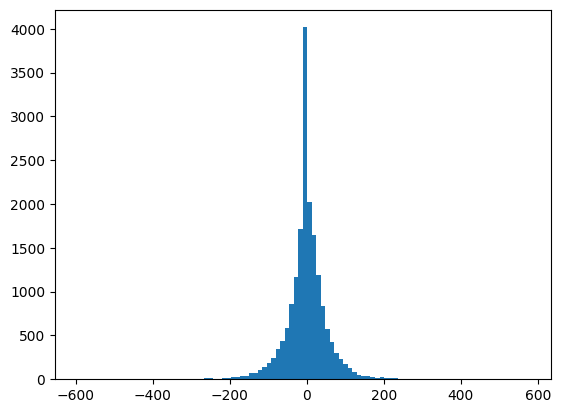

In [ ]:
plt.hist(ohlc['close']-ohlc['open'], bins=100)

In [ ]:
df1.shape

(0, 24)

In [ ]:
ret_vol_norm = (ret_vol - np.mean(ret_vol))/np.std(ret_vol)

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 3.000e+00, 7.000e+00, 4.000e+00, 4.000e+00, 6.000e+00,
        3.000e+00, 6.000e+00, 1.200e+01, 1.100e+01, 9.000e+00, 7.000e+00,
        1.100e+01, 1.900e+01, 3.100e+01, 3.800e+01, 5.000e+01, 7.100e+01,
        1.040e+02, 1.750e+02, 3.640e+02, 7.920e+02, 1.537e+03, 2.969e+03,
        4.210e+03, 2.687e+03, 1.337e+03, 6.050e+02, 3.110e+02, 1.550e+02,
        9.300e+01, 6.700e+01, 4.300e+01, 3.300e+01, 3.300e+01, 2.400e+01,
        1.100e+01, 1.300e+01, 9.000e+00, 1.000e+01, 1.500e+01, 5.000e+00,
        7.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 6.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 1.000e+0

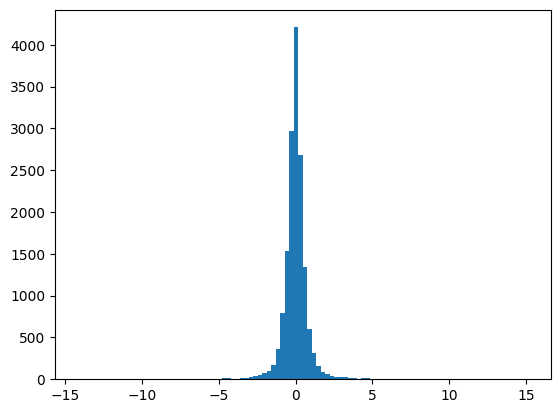

In [ ]:
plt.hist(ret_vol_norm, bins=100)

In [ ]:
len(df1)

534492

In [ ]:
df1['volume'].sum() / len(df1)

17.037727412197

In [ ]:
import statsmodels.api as sm 

In [ ]:
ret_tick_st = np.array(ret_tick)
ret_tick_st = (ret_tick_st - ret_tick_st.mean())/ret_tick_st.std()

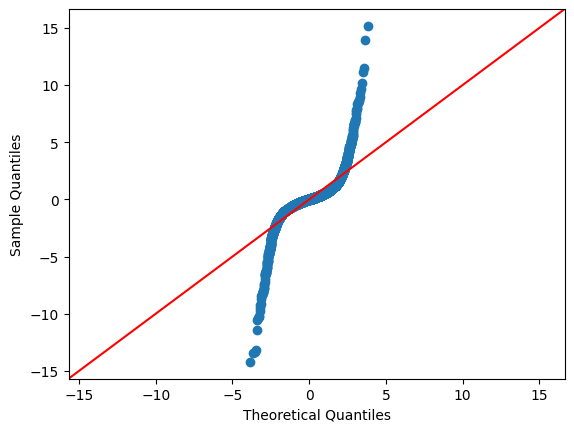

In [ ]:
sm.qqplot(ret_vol_norm, line='45')
print("")

In [ ]:
from scipy.stats import kstest
stat, pval = kstest(ret_vol_norm, 'norm')
stat, pval

(0.14311204163179458, 6.884318821031461e-286)

In [ ]:
ret_vol_st = np.array(ret_vol)
ret_vol_st = (ret_vol_st - ret_vol_st.mean())/ret_vol_st.std()

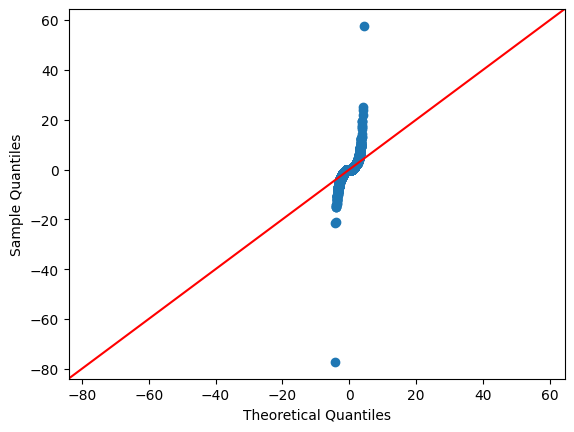

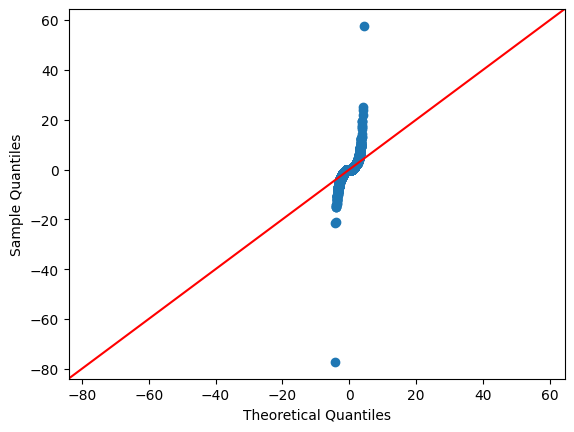

In [ ]:
sm.qqplot(ret_vol_st, line='45')